In [109]:
#Импортируем все необходимые библиотеки и просмотрим файл

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

studmath = pd.read_csv('stud_math.csv')
studmath

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [110]:
#Сделаем все названия колонок одинаково прописными
studmath.columns=list(map(lambda name: name.lower(),studmath.columns))

In [111]:
#Чтобы в дальнейшем было проще работать с данными, 
#проанализирую какие колонки являются числовыми,а какие являются категориальным

#отбираю нечисловые колонки
no_number = studmath.select_dtypes(exclude=[np.number])
display(no_number.columns)

Index(['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [112]:
#отбираю числовые колонки
studmath_n = studmath.select_dtypes(include=[np.number])
numeric_col = studmath_n.columns
numeric_col

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

In [5]:
#далее буду искать пропуски - пустые значения
#существует несколько способов, воспользуюсь процентным соотношением пропусков в каждом столбце
for column in studmath.columns:
    missing = np.mean(studmath[column].isnull())
    print('{} - {}%'.format(column, round(missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
pstatus - 11.0%
medu - 1.0%
fedu - 6.0%
mjob - 5.0%
fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime, granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


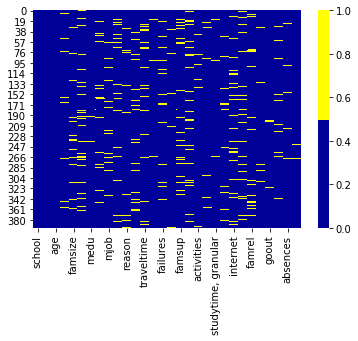

In [113]:
#также можно увидеть пропуски с помощью тепловой карты, 
#желтым отмечены пропуски, как мы видим и в предыдущем способе и в этом 
#колонки school,age,sex без пропусков
colours = ['#000099', '#ffff00'] 
sns.heatmap(studmath.isnull(), cmap=sns.color_palette(colours))

In [114]:
#заполню пустые значения в нечисловых столбцах значением no_info
studmath['no_num_nulls'] = studmath[['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']].isnull().sum(axis=1)
studmath.fillna('no_info')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,score,no_num_nulls
0,GP,F,18,U,no_info,A,4,4,at_home,teacher,...,yes,no_info,no,4,3,4,3,6,30,2
1,GP,F,17,U,GT3,no_info,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,30,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no_info,4,3,2,3,10,50,2
3,GP,F,15,U,GT3,T,4,2,health,no_info,...,yes,yes,yes,3,2,2,5,2,75,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,212,45,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,2,3,80,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,no_info,no,no,5,5,3,3,3,35,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,5,0,50,1


In [16]:
#Проверим на уникальность номинативные показатели, наиболее ярко выраженные
#На мой взгляд это
print("Уникальных значений:", studmath.school.nunique())
print("Уникальных значений:", studmath.address.nunique())
print('Уникальных значений:',studmath.mjob.nunique())
display(studmath.mjob.value_counts())
display(studmath.address.value_counts())
display(studmath.school.value_counts())

Уникальных значений: 2
Уникальных значений: 2
Уникальных значений: 5


other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

U    295
R     83
Name: address, dtype: int64

GP    349
MS     46
Name: school, dtype: int64

In [116]:
#заполню пустые значения в числовых столбцах значением no_info
studmath['num_nulls'] = studmath[['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score']].isnull().sum(axis=1)
studmath.fillna('no_info')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,internet,romantic,famrel,freetime,goout,health,absences,score,no_num_nulls,num_nulls
0,GP,F,18,U,no_info,A,4,4,at_home,teacher,...,no_info,no,4,3,4,3,6,30.0,2,0
1,GP,F,17,U,GT3,no_info,1,1,at_home,other,...,yes,no,5,3,3,3,4,30.0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no_info,4,3,2,3,10,50.0,2,0
3,GP,F,15,U,GT3,T,4,2,health,no_info,...,yes,yes,3,2,2,5,2,75.0,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,5,4,50.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,212,45.0,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,2,3,80.0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,35.0,3,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,5,0,50.0,1,0


In [19]:
#в некоторых числовых колонках пустые значения заменю на медианные 
studmath['goout'].isnull().value_counts() #нашли пустые значения
med_goout = studmath['goout'].median()
studmath['goout'] = studmath['goout'].fillna(med_goout)
print(studmath['goout'].isnull().value_counts())

3.0
False    395
Name: goout, dtype: int64


In [115]:
studmath['score'].isnull().value_counts() #и на среднее
mean_score = studmath['score'].mean()
print(mean_score)
studmath['score'] = studmath['score'].fillna(mean_score)
print(studmath['score'].isnull().value_counts())

52.26221079691517
False    395
Name: score, dtype: int64


In [117]:
#проведем корреляционный анализ числовых признаков
st=studmath.copy()
st=st[['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score']]
st.corr()
#и далее рассмотрим по отдельности признаки, наиболее сильно влияющие на оценку по тесту

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.153279
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.211096
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078392
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.069910
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115572
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.335091
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115572
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.056882
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.018962
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.128933


In [118]:
#наиболее сильная корреляция наблюдается в age, studytime, failures,goout.


#1. Во взаимосвязи score и age наблюдается отрицательная корреляция, вероятно это означает, что
#чем старше становится учащийся, тем хуже оценку по тесту он получит,
#что и доказывает следующая операция
s=st[['age', 'score']]
print(s.groupby('score')['age'].max())

score
0.000000      19
20.000000     17
25.000000     18
30.000000     18
35.000000     21
40.000000     22
45.000000     20
50.000000     19
52.262211     19
55.000000     19
60.000000     19
65.000000     19
70.000000     18
75.000000     20
80.000000     18
85.000000     18
90.000000     20
95.000000     18
100.000000    16
Name: age, dtype: int64


In [119]:
#количество внеучебных неудач отразилось на тесте, но если взять в расчет возраст 
#коэф корреляции между возрастом и неудачами положительный,
#то можно предположить, что после 18 лет учащиеся ищут заработок, например, и жизненных проблем 
#у них становится больше и это сказывается на учебе
s1=studmath[['failures', 'score','age']]
s1
s1.groupby(['score']).max()

,failures,age
score,,
0.000000,3.0,19
20.000000,2.0,17
25.000000,3.0,18
30.000000,0.0,18
35.000000,3.0,21
40.000000,3.0,22
45.000000,3.0,20
50.000000,3.0,19
52.262211,3.0,19


In [70]:
#проанализирова score и studytime можно сделать вывод о том, что чем меньше отводили учащиеся
#время на учебу, тем ниже была оценку по тесту, что вполне логично
s2=studmath[['score','studytime']]
s2.groupby(['score']).max()

,studytime
score,
0.0,4.0
20.0,2.0
25.0,2.0
30.0,4.0
35.0,3.0
40.0,4.0
45.0,3.0
50.0,4.0
55.0,4.0


In [120]:
#также можно увидеть положительную корреляцию между оценкой по тесту и образованием матери,
#лучше всего написали тесты те, у кого у матерей есть высшее образование. Вероятно, такие мамы
#показыввают хороший пример детям
s3=studmath[['score','medu']]
s3.groupby(['medu']).max()

,score
medu,
0.0,75.0
1.0,80.0
2.0,95.0
3.0,95.0
4.0,100.0


In [121]:
#проанализирова score и gouot можно сделать вывод о том, что время с друзьями влияет на самую
#высокую оценку по тесту,  но можно принят в расчет то, что с друзьями также можно 
#заниматься математикой)
s4=studmath[['score','goout']]
s4.groupby(['score']).max()

,goout
score,
0.000000,5.0
20.000000,5.0
25.000000,5.0
30.000000,5.0
35.000000,5.0
40.000000,5.0
45.000000,5.0
50.000000,5.0
52.262211,5.0


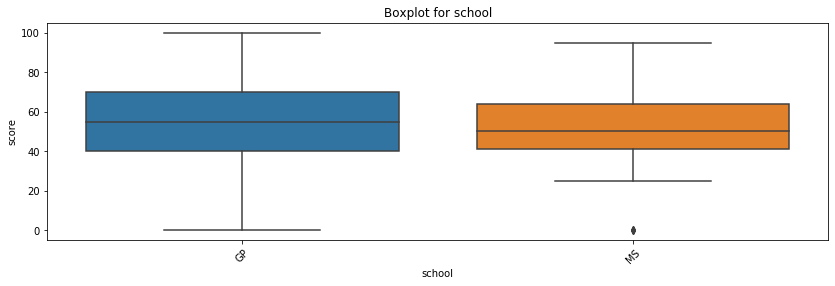

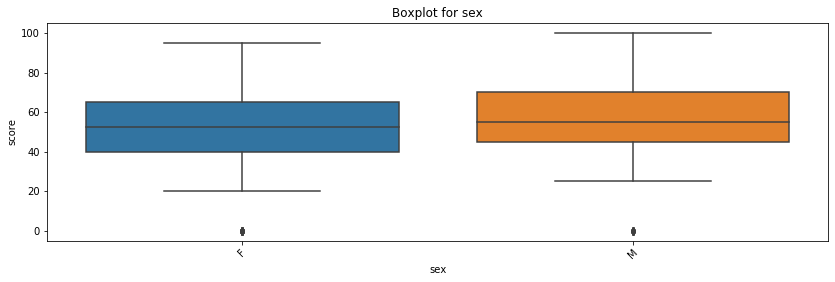

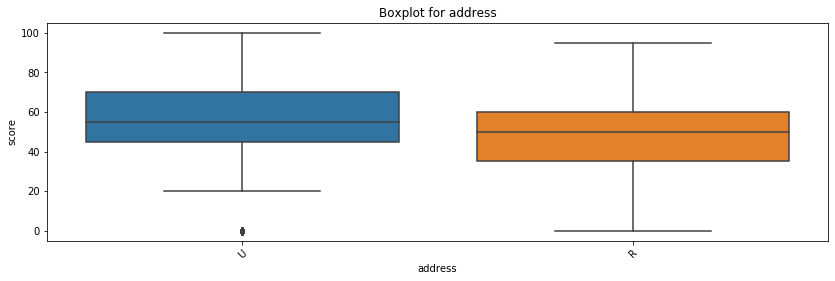

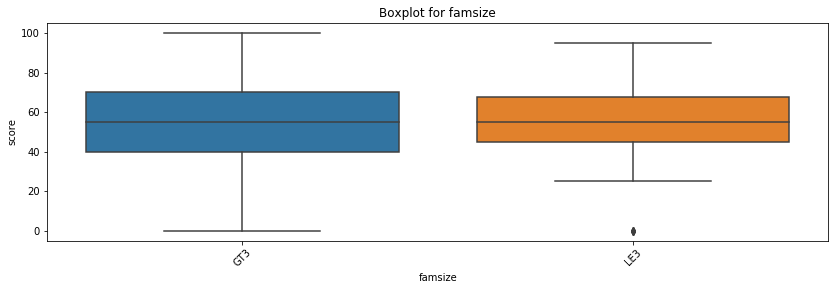

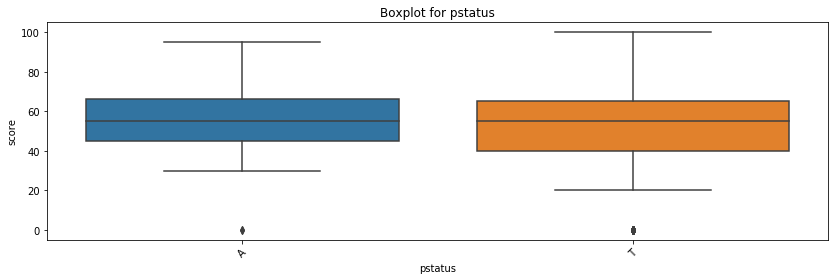

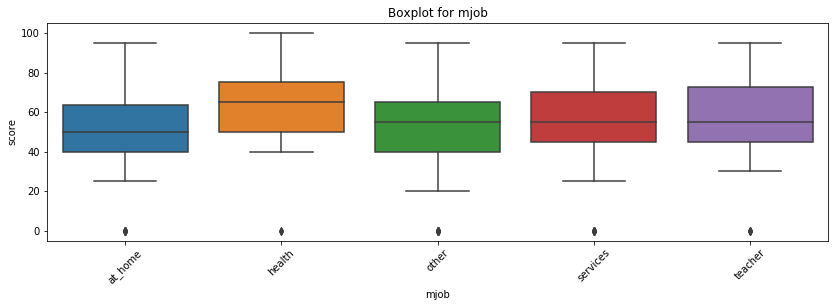

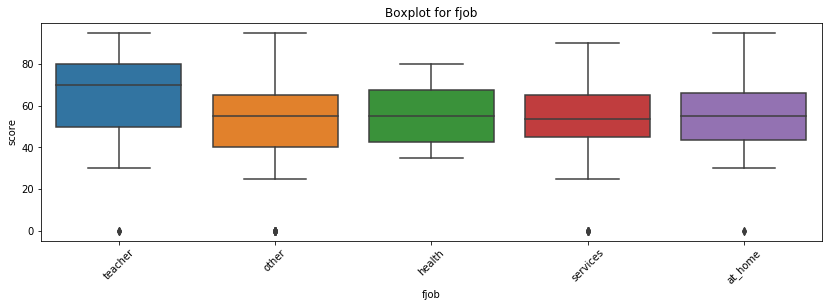

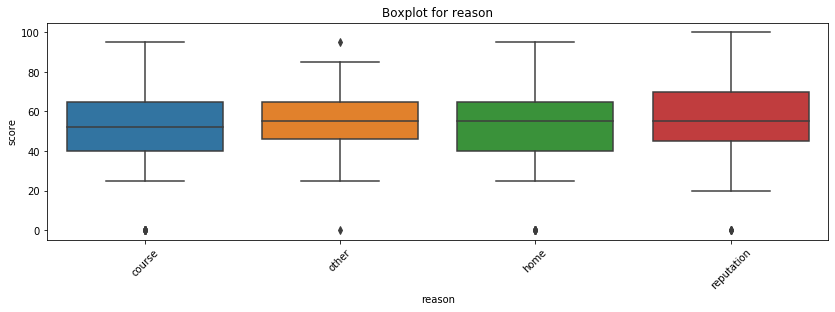

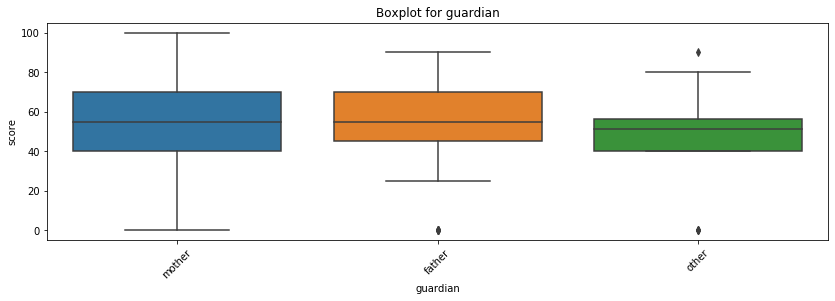

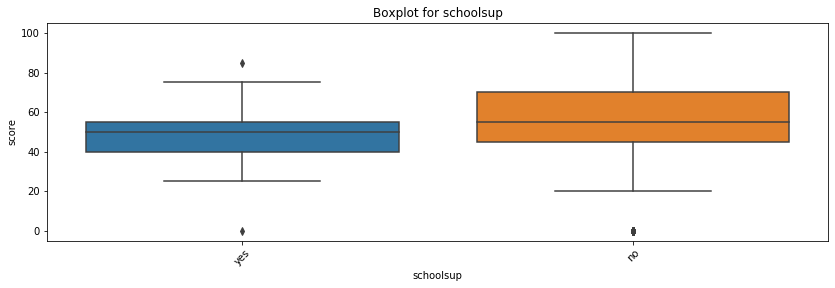

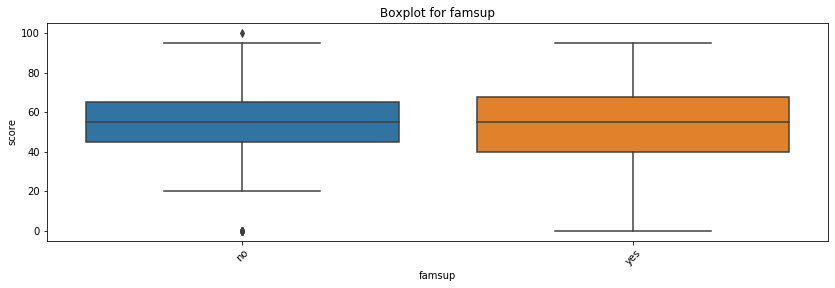

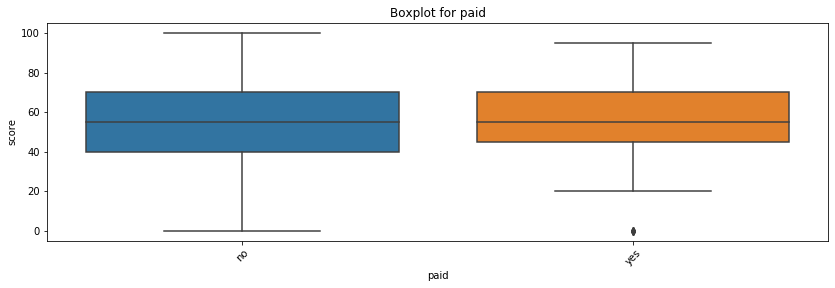

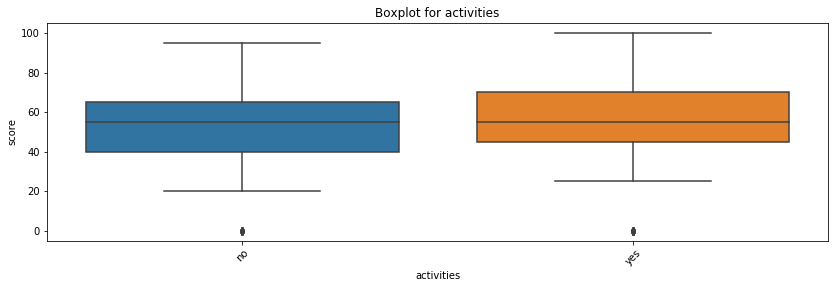

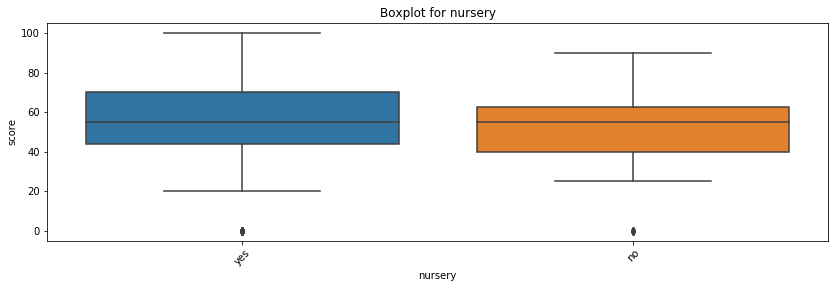

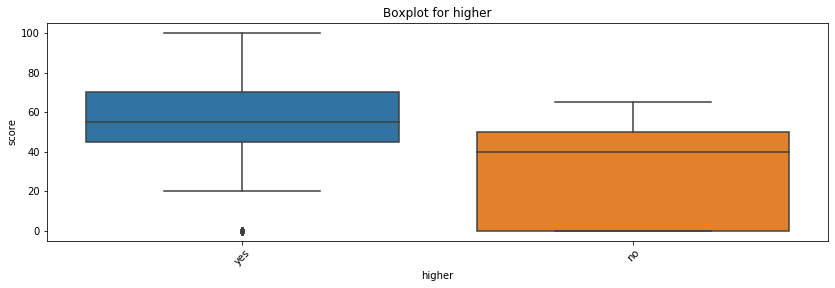

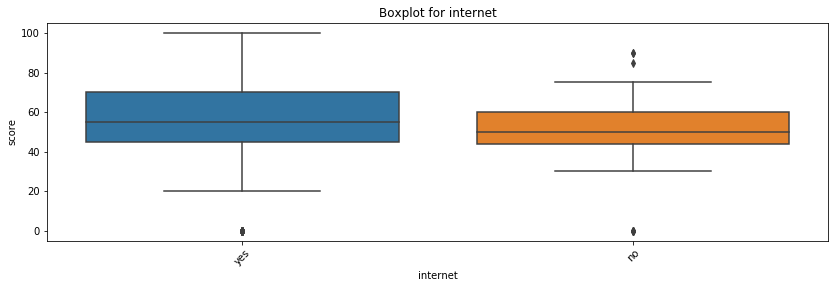

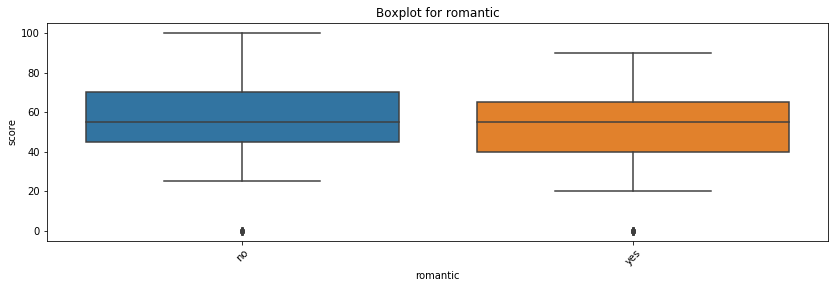

In [122]:
#проанализируем номинативные признаки
s_nomin=studmath[['score','school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']]
s_nomin
def get_boxplot(column):
    fig,ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=s_nomin.loc[s_nomin.loc[:, column].isin(s_nomin.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for column in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(column)

In [123]:
#исходя из графиков видим, что наиболее сильными признакми, влияющими на успеваемость являются
#расположение школы, профессии родителей,доп образовательная поддержка в школе,а также 
#желание получить высшее образование
#Сформируем отдельную таблицу

s_best_nomin=studmath[['score','address', 'mjob', 'fjob',
       'schoolsup', 'higher']]
s_best_nomin.fillna('no_info')
def get_stat_dif(column):
    cols = s_best_nomin.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(s_best_nomin.loc[s_best_nomin.loc[:, column] == comb[0], 'score'], 
                        s_best_nomin.loc[s_best_nomin.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
        

In [124]:
for col in ['address', 'mjob', 'fjob','schoolsup', 'higher']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher


In [140]:
#Итак, составим таблицу из наиболее значимых номинативных и числовых признаков
best_of_the_best=studmath[['score','age', 'mjob','higher','address', 'studytime',
       'failures', 'goout']]
best_of_the_best.fillna('no_info')

,score,age,mjob,higher,address,studytime,failures,goout
0,30.0,18,at_home,yes,U,2,0,4
1,30.0,17,at_home,yes,U,2,0,3
2,50.0,15,at_home,yes,U,2,3,2
3,75.0,15,health,yes,U,3,0,2
4,50.0,16,other,yes,U,2,0,2
...,...,...,...,...,...,...,...,...
390,45.0,20,services,yes,U,2,2,4
391,80.0,17,services,yes,U,1,0,5
392,35.0,21,other,no_info,R,1,3,3
393,50.0,18,services,yes,R,1,0,1


In [ ]:
#Вернемся к сути проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет
#на их успеваемость по математике,чтобы на ранней стадии выявлять студентов, 
#находящихся в группе риска.
Можно сделать вывод о том, что жизненные неудачи и нежелание заниматься 
учебой ведет к плохим оценкам.
Трудолюбие учащегося и профессия родителей, вероятно, смогут улучишть показатели))